In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('employee_insights_cleaned.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employee_id          100 non-null    object 
 1   age                  100 non-null    int64  
 2   salary               100 non-null    int64  
 3   promotion_eligible   100 non-null    object 
 4   last_training_date   100 non-null    object 
 5   department           100 non-null    object 
 6   work_experience      100 non-null    int64  
 7   projects_completed   100 non-null    int64  
 8   hours_worked_weekly  100 non-null    float64
 9   work_mode            100 non-null    object 
 10  last_promotion_date  100 non-null    object 
 11  satisfaction_score   100 non-null    float64
 12  overtime_hours       100 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 10.3+ KB


In [3]:
df.describe()

,age,salary,work_experience,projects_completed,hours_worked_weekly,satisfaction_score,overtime_hours
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,41.450000,86278.060000,9.530000,7.98000,41.916354,6.611000,5.046000
std,10.335166,20948.892635,5.897192,3.92346,7.358341,2.061278,2.692204
min,25.000000,50206.000000,1.000000,1.00000,30.341799,3.000000,0.100000
25%,32.000000,70234.250000,4.000000,4.75000,36.004756,4.700000,2.550000
50%,41.500000,87330.500000,10.000000,8.50000,41.119708,6.750000,5.400000
75%,49.000000,104297.000000,15.250000,12.00000,48.638833,8.200000,7.325000
max,59.000000,119163.000000,19.000000,14.00000,54.895784,10.000000,10.000000


In [54]:
def process_employee_data(df):
    """Cleans and preprocesses a DataFrame of employee data.

    This function performs several standard cleaning operations:
    1.  Converts column names to lowercase snake_case.
    2.  Fills missing 'salary' values with the column's mean.
    3.  Fills missing 'department' values with the string 'Unknown'.
    4.  Standardizes the 'work_mode' column to uppercase.

    Args:
        df (pandas.DataFrame): The input DataFrame containing raw employee
            data. It is expected to have 'salary', 'department', and
            'work_mode' columns.

    Returns:
        pandas.DataFrame: The cleaned and processed DataFrame.

    Examples:
        >>> data = {
        ...     'Employee Name': ['Alice', 'Bob', 'Charlie'],
        ...     'department': ['Engineering', 'HR', np.nan],
        ...     'salary': [95000, 80000, np.nan],
        ...     'work_mode': ['hybrid', 'remote', 'Hybrid']
        ... }
        >>> df_raw = pd.DataFrame(data)
        >>> df_clean = process_employee_data(df_raw.copy())
        >>> print(df_clean)
          employee_name   department   salary work_mode
        0         Alice  Engineering  95000.0    HYBRID
        1           Bob           HR  80000.0    REMOTE
        2       Charlie      Unknown  87500.0    HYBRID
        """
    # Clean column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # Handle missing values
    df['salary'] = df['salary'].fillna(df['salary'].mean())
    df['department'] = df['department'].fillna('Unknown')
    
    # Standardize categories
    df['work_mode'] = df['work_mode'].str.upper()
    
    return df

In [67]:
cleaned_data = process_employee_data(df)
cleaned_data.head()

,employee_id,age,salary,promotion_eligible,last_training_date,department,work_experience,projects_completed,hours_worked_weekly,work_mode,last_promotion_date,satisfaction_score,overtime_hours
0,E0001,53,56910,Y,2022-01-02,It,9,14,44.286826,ONSITE,2020-01-31,9.9,2.1
1,E0002,39,50206,Y,2022-01-09,Hr,12,4,48.524347,ONSITE,2020-02-29,6.8,3.8
2,E0003,32,73419,Y,2022-01-16,Sales,1,9,49.179871,REMOTE,2020-03-31,9.5,9.3
3,E0004,45,100636,Y,2022-01-23,Sales,1,6,50.569759,REMOTE,2020-04-30,4.7,7.2
4,E0005,43,100015,Y,2022-01-30,Hr,15,13,48.605291,HYBRID,2020-05-31,8.3,0.5


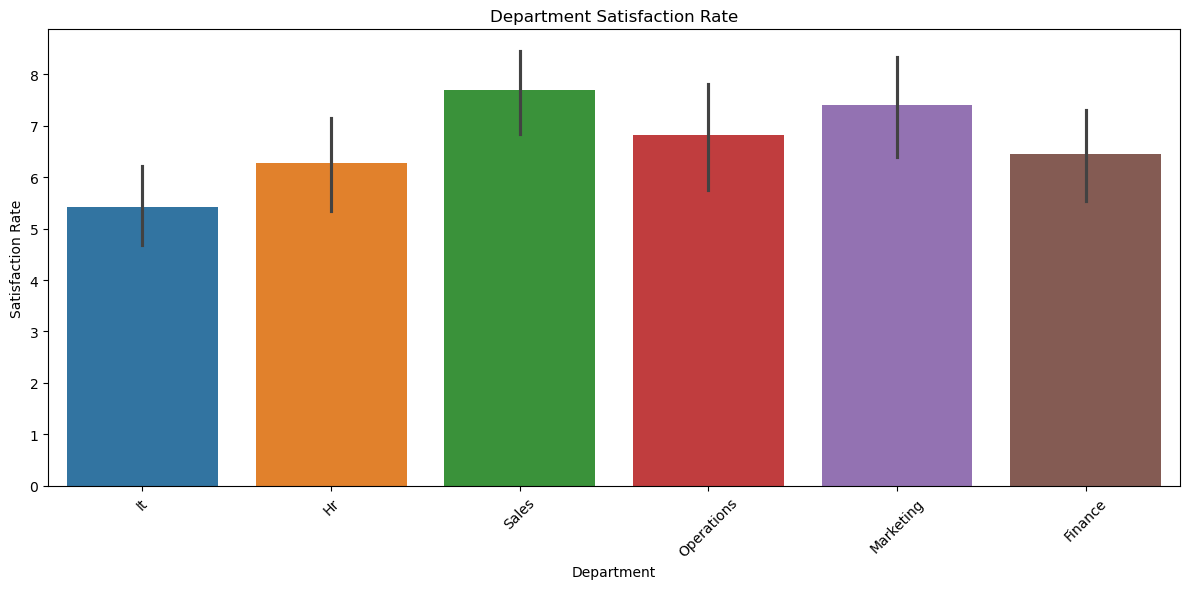

{'metrics':            satisfaction_score       projects_completed      employee_id
                          mean   std               mean  sum       count
 department                                                             
 Finance                  6.45  2.27               7.57  174          23
 Hr                       6.27  1.81               7.47  112          15
 It                       5.42  1.87               8.89  160          18
 Marketing                7.41  1.81               7.33   88          12
 Operations               6.82  2.16               7.56  121          16
 Sales                    7.69  1.65               8.94  143          16,
 'top_department': 'Sales'}

In [66]:
# Add a function to analyze and visualize department performance:
def analyze_department_performance(df):
    """
    Analyze performance metrics by department
    """
    dept_metrics = df.groupby('department').agg({'satisfaction_score': ['mean','std'],
                                              'projects_completed': ['mean','sum'],
                                             'employee_id': 'count'}).round(2)
    
    plt.figure(figsize=(12,6))
    sns.barplot(data = df, x = 'department', y = 'satisfaction_score', hue='department')
    plt.title('Department Satisfaction Rate')
    plt.xlabel('Department')
    plt.ylabel('Satisfaction Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
             
    results = {}
    results['metrics'] = dept_metrics
    results['top_department'] = dept_metrics['satisfaction_score']['mean'].idxmax()
    
    return results
    
dept_analysis = analyze_department_performance(cleaned_data)
dept_analysis

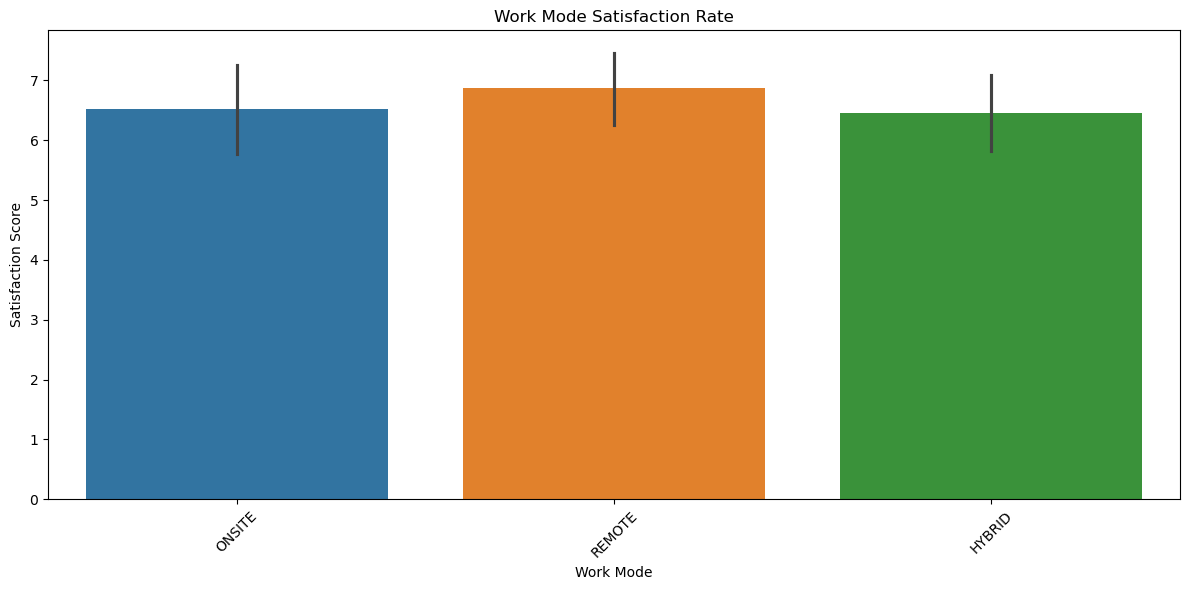

{'metrics':           satisfaction_score       projects_completed      employee_id
                         mean   std               mean  sum       count
 work_mode                                                             
 HYBRID                  6.45  2.08               7.94  278          35
 ONSITE                  6.52  2.22               7.78  249          32
 REMOTE                  6.87  1.91               8.21  271          33,
 'best_work_mode_impact': 'REMOTE'}

In [114]:
def analyze_work_mode_impact(df):
    work_mode_metrics = df.groupby('work_mode').agg({'satisfaction_score': ['mean', 'std'],
                                                     'projects_completed': ['mean','sum'],
                                                     'employee_id': 'count'}).round(2)
    results = {}
    results['metrics'] = work_mode_metrics
    results['best_work_mode_impact'] = work_mode_metrics['satisfaction_score']['mean'].idxmax()

    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x = 'work_mode', y = 'satisfaction_score', hue = 'work_mode')
    plt.title('Work Mode Satisfaction Rate')
    plt.xlabel('Work Mode')
    plt.ylabel('Satisfaction Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results

work_mode_impact = analyze_work_mode_impact(df)
work_mode_impact